<a href="https://colab.research.google.com/github/Thunhaal/Restaurant-Rating-Prediction-ML/blob/main/Task1_Restaurant_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Rating Prediction Using Machine Learning

This notebook implements a machine learning workflow to predict restaurant ratings based on key features like cost, service availability, and user engagement. We compare multiple models and select the best-performing one for final evaluation.


## 1. Load and Inspect Dataset

We begin by loading the dataset and inspecting its structure. This helps us understand the features available and identify any missing or irrelevant data before preprocessing.


In [4]:
df=pd.read_csv('dataset .csv')

### Dataset Overview

Display the first few rows and the structure of the dataset to verify column names, data types, and general content. This gives us insight into which features may be useful for prediction.


In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df['Aggregate rating'].describe()


,Aggregate rating
count,9551.000000
mean,2.666370
std,1.516378
min,0.000000
25%,2.500000
50%,3.200000
75%,3.700000
max,4.900000


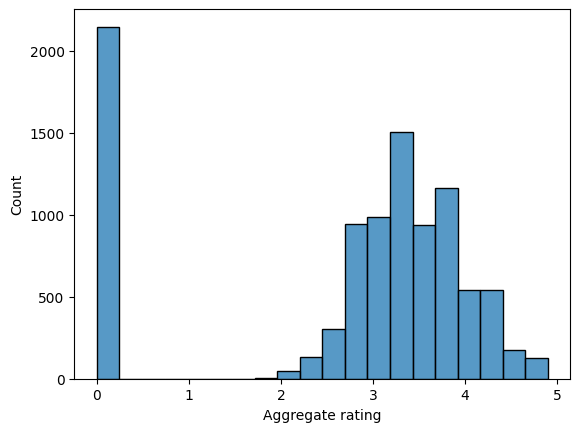

In [8]:
sns.histplot(df['Aggregate rating'], bins=20)
plt.show()


In [9]:
features = [
    'Average Cost for two',
    'Price range',
    'Votes',
    'Has Online delivery',
    'Has Table booking',
    'City'
]

target = 'Aggregate rating'

df = df[features + [target]]
df.head()


,Average Cost for two,Price range,Votes,Has Online delivery,Has Table booking,City,Aggregate rating
0,1100,3,314,No,Yes,Makati City,4.8
1,1200,3,591,No,Yes,Makati City,4.5
2,4000,4,270,No,Yes,Mandaluyong City,4.4
3,1500,4,365,No,No,Mandaluyong City,4.9
4,1500,4,229,No,Yes,Mandaluyong City,4.8


In [10]:
df.dtypes


,0
Average Cost for two,int64
Price range,int64
Votes,int64
Has Online delivery,object
Has Table booking,object
City,object
Aggregate rating,float64


### Missing Value Analysis

Check for missing values to determine if any imputation or cleanup is required. In our case, no missing values were found in the selected columns.


In [16]:
df.isnull().sum()


,0
Average Cost for two,0
Price range,0
Votes,0
Has Online delivery,0
Has Table booking,0
City,0
Aggregate rating,0


### Remove Unrated Restaurants

Entries with aggregate rating equal to zero likely represent restaurants without sufficient reviews and may introduce noise in model training. We filter them out to improve model learning.


In [18]:
df = df[df['Aggregate rating'] > 0]


In [19]:
df.describe()
df.shape


(7403, 7)

### Encode Categorical Features

Convert categorical text features (e.g., city, service flags) into numeric form required by ML models. We use simple label encoding for this purpose.


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['City'] = le.fit_transform(df['City'])


### Train-Test Split

Split the dataset into training and testing sets to evaluate model generalization. We use 80% of the data for training and 20% for testing.


In [21]:
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 2. Baseline Model: Linear Regression

Train a baseline model to establish a reference performance. This helps us evaluate if more complex models are actually improving prediction quality.


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [23]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 0.22041777873949323
R2 Score: 0.28732081577195956


Linear Regression serves as a baseline model; however, its performance is limited due to the assumption of linear relationships in a problem that exhibits complex, non-linear patterns.


## 5. Feature Importance

Inspect the contribution of each feature to the final model’s predictions. This gives insight into which restaurant attributes most influence ratings.


In [24]:
pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
1,Price range,0.208263
2,Votes,0.000341
0,Average Cost for two,0.000001
5,City,-0.002774
3,Has Online delivery,-0.066519
4,Has Table booking,-0.147060


## 3. Decision Tree Regressor

Train a Decision Tree model to capture non-linear relationships between features and ratings. Analyze its performance compared to the baseline.


In [25]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=5
)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))


Decision Tree MSE: 0.13964720241983586
Decision Tree R2: 0.5484771924050582


## 4. Random Forest Regressor (Final Model)

Train an ensemble model that typically generalizes better than a single decision tree by averaging multiple trees. This is our final selection for prediction based on performance metrics.


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Random Forest MSE: 0.12550785400729544
Random Forest R2: 0.5941941003141743


In [27]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

importances


,Feature,Importance
2,Votes,0.692126
5,City,0.128685
0,Average Cost for two,0.117431
1,Price range,0.032652
3,Has Online delivery,0.018640
4,Has Table booking,0.010467


In [28]:
importances


,Feature,Importance
2,Votes,0.692126
5,City,0.128685
0,Average Cost for two,0.117431
1,Price range,0.032652
3,Has Online delivery,0.018640
4,Has Table booking,0.010467


### Model Evaluation

Compare model performance metrics (MSE and R²) to determine which model best predicts restaurant ratings. R² close to 1 indicates better explanatory power.


In [29]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "R2 Score": [0.287, 0.548, 0.594],
    "MSE": [0.220, 0.139, 0.125]
})

comparison


,Model,R2 Score,MSE
0,Linear Regression,0.287,0.220
1,Decision Tree,0.548,0.139
2,Random Forest,0.594,0.125


## Conclusion

The Random Forest Regressor achieved the best performance with an R² score of approximately 0.59 and the lowest MSE, indicating reasonable predictive ability for this dataset. User votes and cost-related features were the most influential predictors. Limitations include the subjective nature of ratings and limited feature representation.


## Future Work

Potential improvements could include:
- One-hot encoding for city and cuisine features
- Hyperparameter tuning with grid search or random search
- Use of additional features if available (e.g., review text sentiment)
